In [1]:
import numpy as np
import scipy.special as ss
import matplotlib as mpl
import matplotlib.pyplot as plt
import single_membrane_hydrodynamics as mh
import parallel_membrane_hydrodynamics as pmh
import vesicle_hydrodynamics as vh

In [2]:
d = 10.0

temperature = 298.0

kT = 1.38064852e-2 * temperature

viscosity = 0.890

alpha_over_a = 0.1

_level_of_tess_1 = 4
_level_of_tess_2 = 5

_plane_separation_1 = 5.0 * d
_plane_separation_2 = 10.0 * d

iter_max = 7

_n_x = (iter_max + 1) * 2
_n_y = np.round ((iter_max + 1) * 2.4).astype ('int')

if (_n_y % 2 != 0):
    _n_y += 1

_n_quad_points = 72
_n_bins = 100

In [3]:
SingleHydro = mh.SingleMembraneHydro (_lattice_parameter = d,
                             _lattice_n_x = _n_x, _lattice_n_y = _n_y,
                             _temperature = temperature, _viscosity = viscosity,
                             _alpha_over_a = alpha_over_a, _n_quadrature_points = _n_quad_points)

cut-off radius = 5.25037567904332


In [4]:
ParHydro1 = pmh.ParallelMembraneHydro (_lattice_parameter = d,
                             _lattice_n_x = _n_x, _lattice_n_y = _n_y, _planes_separation = _plane_separation_1,
                             _temperature = temperature, _viscosity = viscosity,
                             _alpha_over_a = alpha_over_a, _n_quadrature_points = _n_quad_points)

ParHydro2 = pmh.ParallelMembraneHydro (_lattice_parameter = d,
                             _lattice_n_x = _n_x, _lattice_n_y = _n_y, _planes_separation = _plane_separation_2,
                             _temperature = temperature, _viscosity = viscosity,
                             _alpha_over_a = alpha_over_a, _n_quadrature_points = _n_quad_points)

  0% (2 of 500) |                        | Elapsed Time: 0:00:00 ETA:   0:00:30

cut-off radius = 5.25037567904332
preparing inverse Hankel transforms...


N/A% (0 of 500) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

preparing far field...
cut-off radius = 5.25037567904332
preparing inverse Hankel transforms...


100% (500 of 500) |######################| Elapsed Time: 0:00:57 ETA:  00:00:00

preparing far field...


In [5]:
VesHydro1 = vh.VesicleHydro (_lattice_parameter=d,
                             _level_of_tess=_level_of_tess_1,
                             _temperature=temperature, _viscosity=viscosity,
                             _alpha_over_a=alpha_over_a, _n_quadrature_points=_n_quad_points)

VesHydro2 = vh.VesicleHydro (_lattice_parameter=d,
                             _level_of_tess=_level_of_tess_2,
                             _temperature=temperature, _viscosity=viscosity,
                             _alpha_over_a=alpha_over_a, _n_quadrature_points=_n_quad_points)

Number of particles =  642
Vesicle radius =  66.51627158643124
Area per particle =  86.60254037844383
Effective radius of each particle =  5.250375679043319
Number of particles =  2562
Vesicle radius =  132.8770404392079
Area per particle =  86.60254037844385
Effective radius of each particle =  5.250375679043319


In [6]:
SingleHydro.calc_friction_tensor ()

ParHydro1.calc_friction_tensor ()
ParHydro2.calc_friction_tensor ()

VesHydro1.calc_friction_tensor ()
VesHydro2.calc_friction_tensor ()

In [7]:
SingleHydro.calc_diffusion_tensor_direct ()

ParHydro1.calc_diffusion_tensor_direct ()
ParHydro2.calc_diffusion_tensor_direct ()

VesHydro1.calc_diffusion_tensor_direct ()
VesHydro2.calc_diffusion_tensor_direct ()

In [8]:
r_flat, zeta_hist_flat, zeta_min_flat, zeta_max_flat = SingleHydro.get_histogram (SingleHydro.zeta, _n_bins)

r_par10, zeta_hist_par10, zeta_min_par10, zeta_max_par10 = ParHydro1.get_histogram (ParHydro1.zeta_00, _n_bins)
r_par11, zeta_hist_par11, zeta_min_par11, zeta_max_par11 = ParHydro1.get_histogram (ParHydro1.zeta_01, _n_bins)

r_par20, zeta_hist_par20, zeta_min_par20, zeta_max_par20 = ParHydro2.get_histogram (ParHydro2.zeta_00, _n_bins)
r_par21, zeta_hist_par21, zeta_min_par21, zeta_max_par21 = ParHydro2.get_histogram (ParHydro2.zeta_01, _n_bins)

r_ves1, zeta_hist_ves1, zeta_min_ves1, zeta_max_ves1 = VesHydro1.get_histogram (VesHydro1.zeta, _n_bins)
r_ves2, zeta_hist_ves2, zeta_min_ves2, zeta_max_ves2 = VesHydro2.get_histogram (VesHydro2.zeta, _n_bins)

In [10]:
r_flat, D_hist_flat, D_min_flat, D_max_flat = SingleHydro.get_histogram (SingleHydro.D, _n_bins)

r_par10, D_hist_par10, D_min_par10, D_max_par10 = ParHydro1.get_histogram (ParHydro1.D_00, _n_bins)
r_par11, D_hist_par11, D_min_par11, D_max_par11 = ParHydro1.get_histogram (ParHydro1.D_01, _n_bins)

r_par20, D_hist_par20, D_min_par20, D_max_par20 = ParHydro2.get_histogram (ParHydro2.D_00, _n_bins)
r_par21, D_hist_par21, D_min_par21, D_max_par21 = ParHydro2.get_histogram (ParHydro2.D_01, _n_bins)

r_ves1, D_hist_ves1, D_min_ves1, D_max_ves1 = VesHydro1.get_histogram (VesHydro1.D, _n_bins)
r_ves2, D_hist_ves2, D_min_ves2, D_max_ves2 = VesHydro2.get_histogram (VesHydro2.D, _n_bins)

In [11]:
r_list = [r_flat,
          r_par10, r_par11,
          r_par20, r_par21,
          r_ves1, r_ves2]

zeta_hist_list = [zeta_hist_flat,
                  zeta_hist_par10, zeta_hist_par11,
                  zeta_hist_par20, zeta_hist_par21,
                  zeta_hist_ves1, zeta_hist_ves2]

D_hist_list = [D_hist_flat,
               D_hist_par10, D_hist_par11,
               D_hist_par20, D_hist_par21,
               D_hist_ves1, D_hist_ves2]

In [13]:
r_c_list = np.array ([SingleHydro.r_c])

In [14]:
Stokes_zeta = 6.0 * np.pi * viscosity * r_c_list
Stokes_D = kT / (6.0 * np.pi * viscosity * r_c_list)

r_oseen = np.linspace (0.5 * d, 10.0 * d, 1000) 
Oseen_D = kT / (8.0 * np.pi * viscosity * r_oseen)

In [15]:
label_list = ["single planar membrane",
              "$\parallel$ membranes ($h = {:2.1f}".format (ParHydro1.h / d) + "a$) same",
              "$\parallel$ membranes ($h = {:2.1f}".format (ParHydro1.h / d) + "a$) cross",
              "$\parallel$ membranes ($h = {:2.1f}".format (ParHydro2.h / d) + "a$) same",
              "$\parallel$ membranes ($h = {:2.1f}".format (ParHydro2.h / d) + "a$) cross",
              "spherical vesicle ($R = {:2.1f}".format (VesHydro1.R / d) + "a$)",
              "spherical vesicle ($R = {:2.1f}".format (VesHydro2.R / d) + "a$)"]

In [16]:
additional_label_list = ["Stokes-Einstein diffusion", "Oseen tensor"]

additional_line_style = ["--", "-.", ":"]

In [17]:
color_list = ['xkcd:steel blue', 'xkcd:orange red', 'xkcd:orange red', 'xkcd:gray green', 'xkcd:gray green', 'xkcd:burgundy', 'xkcd:burnt sienna']

line_style_list = ['--', '--', '-.', '--', '-.', '--', '--']
marker_list = ['s', 'P', 'X', 'P', 'X', 'o', 'o']

color_gray = 'xkcd:gray'

label_font_size = 24
legend_font_size = 18

line_width = 3

(-0.5, 7.2)

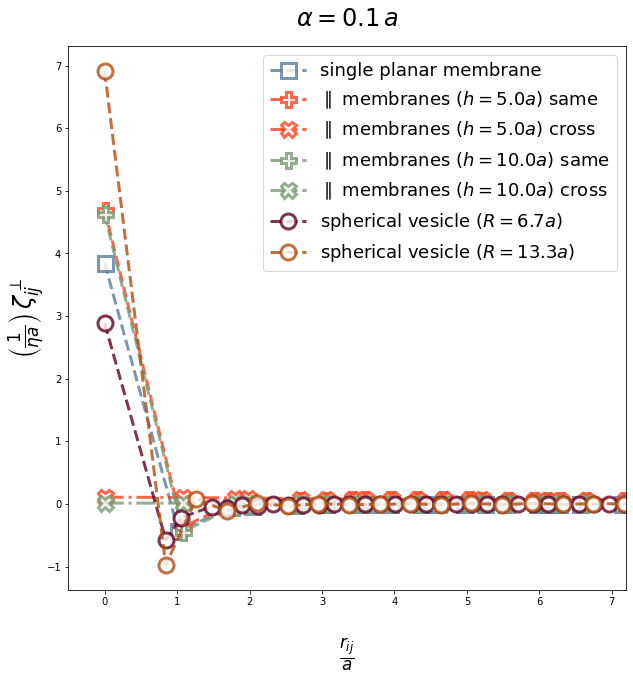

In [20]:
fac = 1.0 / (viscosity * d)

plt.figure (figsize = (10, 10))

ax = plt.axes()

#plt.plot ([-0.5, 10.2], [Stokes_zeta[0] * fac, Stokes_zeta[0] * fac], color = color_gray,
#          linewidth = line_width, alpha = 0.95,
#          linestyle=additional_line_style[0], label = additional_label_list[0])
    
for i in range(len(r_list)):

    plt.plot (r_list[i] / d, zeta_hist_list[i] * fac, color = color_list[i],
              markersize = 15, marker = marker_list[i], markerfacecolor='white',
              linewidth = line_width, markeredgewidth = line_width, alpha = 0.8, linestyle=line_style_list[i], label = label_list[i])

plt.legend (fontsize = legend_font_size)
plt.title(r"$\alpha = " + str(alpha_over_a) + "\, a$", fontsize = label_font_size, pad=20)

plt.xlabel (r"$\frac{r_{ij}}{a}$", fontsize = label_font_size, labelpad = 30)
plt.ylabel (r"$\left(\frac{1}{\eta a}\right)\,\zeta^{\perp}_{ij}$", fontsize = label_font_size, labelpad = 0)

plt.xlim ([-0.5, 7.2])

(-0.02, 0.52)

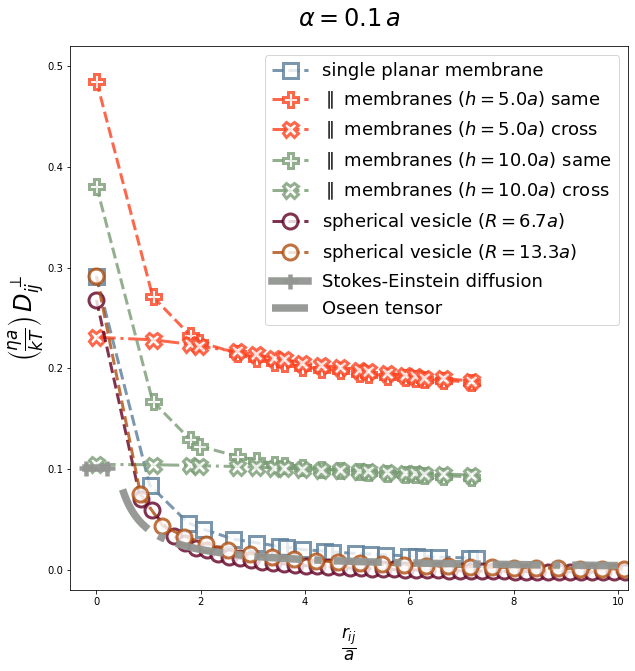

In [22]:
fac =  viscosity * d / kT

plt.figure (figsize = (10, 10))

ax = plt.axes()

for i in range(len(r_list)):

    plt.plot (r_list[i] / d, D_hist_list[i] * fac, color = color_list[i],
              markersize = 15, marker = marker_list[i], markerfacecolor='white',
              linewidth = line_width, markeredgewidth = line_width, alpha = 0.8, linestyle=line_style_list[i], label = label_list[i])

plt.plot ([-0.2, 0.2], [Stokes_D[0] * fac, Stokes_D[0] * fac], color = color_gray,
          linewidth = line_width * 2.5, alpha = 0.95, marker = "+", markersize=15, markeredgewidth=line_width * 1.5,
          linestyle='-', label = additional_label_list[0])

plt.plot (r_oseen / d, Oseen_D * fac, color = color_gray,
          linewidth = line_width * 2.5, alpha = 0.95,
          linestyle=additional_line_style[1], label = additional_label_list[1])

plt.title(r"$\alpha = " + str(alpha_over_a) + "\, a$", fontsize = label_font_size, pad=20)

plt.legend (fontsize = legend_font_size, loc = 1)

plt.xlabel (r"$\frac{r_{ij}}{a}$", fontsize = label_font_size, labelpad = 20)
plt.ylabel (r"$\left(\frac{\eta a}{kT}\right)\,D^{\perp}_{ij}$", fontsize = label_font_size, labelpad = 0)

plt.xlim ([-0.5, 10.2])
plt.ylim ([-0.02, 0.52])